# Universe method

by Reece Colclough and Oleg Glotov

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

# ignore warnings for the KPSS test 
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

In order to find the best stationarity pair, we need to utilize both the ADF test and the KPSS test. Both tests have their drawback and potential issue, therefore, a pair of stocks that performs well in both tests are likely to be more stationary. We construct this test statistic in the following way:
$$\text{Stationariy Score} = - \text{KPSS Stats} - \text{ADF Test}$$
since a low KPSS stats and a low ADF stats both indicates stronger evidence of stationarity (how we weight these two stats is subjective to improvement)

In [2]:
def check_stationarity(series, alpha):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series,regression='ct')
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely trend stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely trend stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely unstationary")

    #return result_adf[1]

     #print("----------------------------------------------------------------")
    
    # Since we are focusing on the trend stationarity, we will use the KPSS test
    result_kpss = kpss(series, regression='ct')
    kpss_stat = result_kpss[0]
    p_val = result_kpss[1]
    if p_val > alpha:
        #reject, likely stationary
        print("KPSS test: KPSS stats:", kpss_stat, "p-val=", p_val, "-> Conclusion: likely trend stationary")
    else:
        print("KPSS test: KPSS stats:", kpss_stat, "p-val=", p_val, "-> Conclusion: likely not trend stationary")
    
    station_score = -kpss_stat - result_adf[0]
    return station_score


In [3]:
def methodology(stk1, stk2):
    diff = abs(stk1["Adj Close"] - stk2["Adj Close"])

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    #line = reg.intercept + reg.slope*time
    #new_series = diff - line

    return check_stationarity(diff, 0.05), reg.slope

In [4]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2022-09-15"
    end_date = "2024-09-15"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [5]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [6]:
# Download Data

universe = ["AAPL","AAL","AMD","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]
# universe = ["AAPL","AAL","AMD","AMZN",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
# normalize the stock price for all the stocks so that the first date's price is 1
for i in range(len(stk_data)):
    stk_data[i]["Adj Close"] = stk_data[i]["Adj Close"]/stk_data[i]["Adj Close"][0]

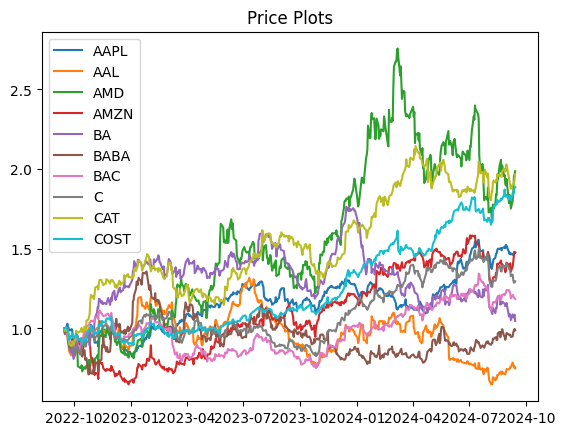

In [8]:
plt.figure()
i = 0
for x in stk_data[:10]:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Price Plots")
plt.savefig('Stock Prices.png', dpi = 1500)
# plt.show()

In [9]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
slope = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j],slope[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.7965070634223983 -> Conclusion: likely unstationary
KPSS test: KPSS stats: 0.33204064425516794 p-val= 0.01 -> Conclusion: likely not trend stationary
AAPLAMD
ADF test: p-val= 0.7334173823827395 -> Conclusion: likely unstationary
KPSS test: KPSS stats: 0.27900845126793533 p-val= 0.01 -> Conclusion: likely not trend stationary
AAPLAMZN
ADF test: p-val= 0.13516496729423583 -> Conclusion: likely unstationary
KPSS test: KPSS stats: 0.189858074670755 p-val= 0.019803221998466874 -> Conclusion: likely not trend stationary
AAPLBA
ADF test: p-val= 0.384688589108506 -> Conclusion: likely unstationary
KPSS test: KPSS stats: 0.1825920280620982 p-val= 0.02252798947671317 -> Conclusion: likely not trend stationary
AAPLBABA
ADF test: p-val= 0.12392136555962918 -> Conclusion: likely unstationary
KPSS test: KPSS stats: 0.16401699177449058 p-val= 0.034985840187924507 -> Conclusion: likely not trend stationary
AAPLBAC
ADF test: p-val= 0.5589700129225635 -> Conclusion: likely uns

In [10]:
# Create a heatmap of slope using Matplotlib
plt.figure(figsize=(stockNum, stockNum),dpi=250)
heat_map_slope = sbn.heatmap(slope, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Slope for Stationary Pairs")

plt.savefig('HeatMap_slope.png')
plt.show()

In [11]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum),dpi=250)
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stionarity Scores for Stationary Pairs")

plt.savefig('HeatMap_stionarity_score.png')
plt.show()

In [12]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMZN        BA      BABA       BAC   
0   1.000000  1.257486  1.459960  2.799203  2.207895  2.865850  1.453499  \
1   1.257486  1.000000  2.441700  1.062820  2.027057  4.539617  1.170876   
2   1.459960  2.441700  1.000000  2.269710  1.572973  1.675577  1.849596   
3   2.799203  1.062820  2.269710  1.000000  2.467456  1.491019  3.319769   
4   2.207895  2.027057  1.572973  2.467456  1.000000  0.946419  1.130473   
5   2.865850  4.539617  1.675577  1.491019  0.946419  1.000000  3.802205   
6   1.453499  1.170876  1.849596  3.319769  1.130473  3.802205  1.000000   
7   1.393550  1.463080  2.534092  3.257975  1.486511  1.887106  2.180270   
8   1.614740  1.782962  3.151872  2.999080  1.104801  1.888122  2.060614   
9   2.025621  0.695011  1.867139  1.079786  1.004859  1.233862  3.401911   
10  1.903778  2.219637  1.634576  2.283773  2.592127  3.201770  0.795932   
11  1.625617  3.034193  2.016229  1.247145  1.384134  2.890190  2.128110   
1

In [13]:
print(sol)
print()
n = 30
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0         C     WFC  5.541380
1       CAT     MPC  4.930988
2       AMD     MPC  4.840393
3      BABA     PFE  4.667226
4      CSCO     XOM  4.630118
..      ...     ...       ...
898    LULU     PFE  0.035700
899    INTC     PFE -0.491871
900     IBM    LULU -0.557335
901     IBM    INTC -0.567356
902    COST    LULU -0.607199

[903 rows x 3 columns]

last 30 rows

    level_0 level_1         0
873    AMZN     NKE  0.681959
874     DIS    LULU  0.670993
875    CSCO     PFE  0.653995
876    INTC    MRNA  0.632727
877    INTC    TSLA  0.629725
878     IBM     NKE  0.622668
879      KO     NKE  0.614273
880     LMT     MPC  0.557375
881    COST     MRK  0.555523
882     CAT    LULU  0.550458
883      BA     PFE  0.522519
884     DIS    INTC  0.493489
885     DLR    LULU  0.472878
886     CVX      GS  0.472532
887     CVX     LMT  0.410892
888      GS     NKE  0.399848
889     LMT     NKE  0.394079
890    COST    INTC  0.317066
891     CAT    INTC  0.273596
8

In [14]:
# add a new column to the dataframe
sol['slope'] = sol.apply(lambda row: slope[universe.index(row['level_0'])][universe.index(row['level_1'])], axis=1)
sol.columns = ['Stock 1', 'Stock 2', 'Stationarity Score', 'Slope']
# display the top 30 pairs with positive slope
print()
print("Top 30 Pairs with Positive Slope")
print()
print(sol[sol['Slope'] > 0].head(30))


Top 30 Pairs with Positive Slope

   Stock 1 Stock 2  Stationarity Score     Slope
3     BABA     PFE            4.667226  0.000205
4     CSCO     XOM            4.630118  0.000127
6      AAL    BABA            4.539617  0.000137
8      AMD    RIOT            4.462939  0.001342
9     INTC    LULU            4.404051  0.000408
11       F    MSFT            4.367320  0.001857
12     CVX     JNJ            4.362030  0.000061
13      GM    NFLX            4.321291  0.003339
16       C     LMT            4.186173  0.000045
17    BABA     NKE            4.154206  0.000114
18      BA     MRK            4.145212  0.000514
19     WFC    SCHW            4.060655  0.000792
21     BAC      VZ            4.039353  0.000002
24     DIS     MRK            3.944972  0.000702
25     JPM    NFLX            3.941701  0.002012
27     WFC      WM            3.903432  0.000089
28    MSFT    RIOT            3.892024  0.000523
29    CSCO    EQIX            3.890713  0.000316
30    BABA      VZ            3.88